In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import fsolve
from pathlib import Path

In [2]:
#Definition
#Find the point inteception between two lines     
def findIntersection(m, y, m1, y1, x0):
    x = np.linspace(-10.0, 15.5, 200)
    return fsolve(lambda x : (m*x + y) - (m1*x + y1), x0)

In [3]:
# Readeing the file
dfCand = pd.read_csv("../GAIA-PS1-cans-new.csv")
tab = Table.from_pandas(dfCand)

tabTrue = Table.read("../True-PN-DR7LAMOST/DR7lamost-True-PN-duplicate-GAIA-PS1-final-saturated.ecsv", format="ascii.ecsv")
dfLP = pd.read_csv("../Likely-PN-DR7LAMOST/DR7lamost-Likely-PN-duplicate-GAIA-PS1.csv")
tabTrue.sort("RA")
len(tabTrue)
print(tab.columns)

<TableColumns names=('recno','SpecL','LAMOST','RAJ2000','DEJ2000','Subclass','rmag','ClassADL','GroupID','GroupSize','CDS-plot','DR3Name','RAdeg','DEdeg','errHalfMaj','errHalfMin','errPosAng','SolID','Source','RandomI','e_RAdeg','e_DEdeg','Plx','e_Plx','RPlx','PM','pmRA','e_pmRA','pmDE','e_pmDE','RADEcor','RAPlxcor','RApmRAcor','RApmDEcor','DEPlxcor','DEpmRAcor','DEpmDEcor','PlxpmRAcor','PlxpmDEcor','pmRApmDEcor','NAL','NAC','NgAL','NbAL','gofAL','chi2AL','epsi','sepsi','Solved','APF','nueff','pscol','e_pscol','RApscolCorr','DEpscolCorr','PlxpscolCorr','pmRApscolCorr','pmDEpscolCorr','MatchObsA','Nper','amax','MatchObs','IPDgofha','IPDgofhp','IPDfmp','IPDfow','RUWE','Dup','o_Gmag','FG','e_FG','RFG','Gmag','e_Gmag','o_BPmag','FBP','e_FBP','RFBP','BPmag','e_BPmag','o_RPmag','FRP','e_FRP','RFRP','RPmag','e_RPmag','E(BP/RP)','NBPcont','NBPblend','NRPcont','NRPblend','Mode','BP-RP','BP-G','G-RP','RV','e_RV','n_RV','o_RV','o_RVd','RVNper','RVS/N','RVgof','RVchi2','RVTdur','RVamp','RVtempTeff

In [4]:
# True
G_r_t = tabTrue['Gmag'] - tabTrue['rmag']
G_g_t = tabTrue['Gmag'] - tabTrue['gmag_x']
bp_rp_t = tabTrue['BP-RP']
tabTrue["G - r"] = G_r_t
tabTrue["G - g"] = G_g_t

### Latex format 

In [5]:
import astropy.coordinates as coord
import astropy.units as u
def format_RA(ra):
    return coord.Angle(ra, unit=u.deg).to_string(u.hour, sep=':', precision=2, pad=True)

def format_DEC(dec):
    s = coord.Angle(dec, unit=u.deg).to_string(sep=':', precision=1, pad=True)
    if s.startswith('-'):
        return r'$-$' + s[1:]
    else:
        return s
def color_fmt(c):
    """Write color to accuracy of 0.01"""
    return "{:.2f}".format(c)

In [6]:
col_tex = ["Name", "RAdeg", "DEdeg", "MajDiam", "G - g", "G - r", "BP-RP"]
tabTrue_tex = tabTrue[col_tex]

In [7]:
# Apply the formatting functions to the DataFrame columns
tabTrue_tex['RAdeg'] = [format_RA(ra) for ra in tabTrue_tex['RAdeg']]
tabTrue_tex['DEdeg'] = [format_DEC(dec) for dec in tabTrue_tex['DEdeg']]
tabTrue_tex['G - g'] = [color_fmt(G_g) for G_g in tabTrue_tex['G - g']]
tabTrue_tex['G - r'] = [color_fmt(G_r) for G_r in tabTrue_tex['G - r']]
tabTrue_tex['BP-RP'] = [color_fmt(bp) for bp in tabTrue_tex['BP-RP']]

In [8]:
tabTrue_tex.show_in_notebook()

idx,Name,RAdeg,DEdeg,MajDiam,G - g,G - r,BP-RP
0,M 1-4,03:41:43.42,52:17:00.3,4.2,2.81,2.60,0.70
1,IC 2003,03:56:21.99,33:52:30.7,10.0,2.02,1.06,-0.16
2,M 2-2,04:13:15.03,56:56:58.4,13.0,0.03,0.45,0.89
3,K 3-67,04:39:47.93,36:45:42.5,--,3.78,3.50,0.41
4,CoMaC 2,05:21:57.03,39:31:02.5,12.0,-0.46,-0.08,0.95
5,K 3-69,05:41:22.13,39:15:08.0,--,0.70,0.80,0.64
6,K 3-70,05:58:45.35,25:18:43.9,5.5,2.77,4.07,0.98
7,Abell 14,06:11:08.66,11:46:43.8,40.0,-0.32,-0.03,0.76
8,Abell 20,07:22:57.67,01:45:34.0,67.3,0.14,-0.21,-0.38
9,Abell 21,07:29:02.71,13:14:48.5,750.0,0.17,-0.29,-0.50


In [9]:
#Save as latex
latex_columns = ["Name", "\(\mathrm{RA}\)", "\(\mathrm{Dec}\)", "\(\mathrm{PN diameter (HASH)}", "$G - g$", "$G - r$", "$BP-RP$"
                 ]
tabTrue_tex.write('../Text/tableInfo-True.tex', format = "ascii.latex",
                     col_align='r'*len(latex_columns),
                     names=latex_columns,
                     overwrite=True)

# Spliting True PN sample

The better

In [10]:
m_better =  0.2*bp_rp_t + 0.15 <= G_r_t  
tabTrue_better = tabTrue[m_better]

In [11]:
# True
G_r_t_better = tabTrue_better['Gmag'] - tabTrue_better['rmag']
bp_rp_t_better = tabTrue_better['BP-RP']
tabTrue_better["G - r"] = G_r_t_better

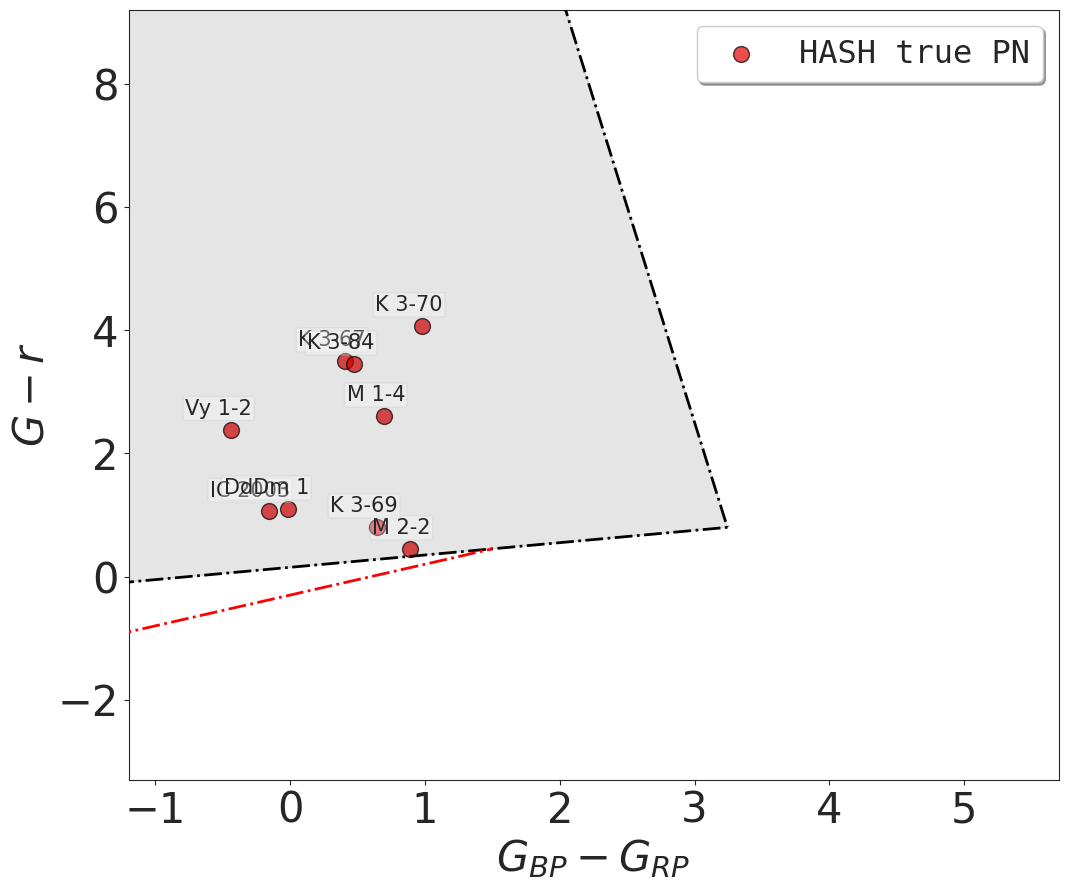

In [12]:
#Plotting
lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - r$', fontsize=30)
ax.set_xlim(-1.2, 5.7)
ax.set_ylim(-3.3, 9.2)
#ax.set_xlim(0, 2)
#ax.set_ylim(-2, 2)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
#ax.scatter(bp_rp_f, G_r_f, s=150, c = sns.xkcd_palette(["denim blue"]), edgecolors= "b", zorder = 1, lw=3, alpha = 0.7, label = "PN candidates")
ax.scatter(bp_rp_t_better, G_r_t_better, s=130, c = sns.xkcd_palette(["red"]), edgecolors= "k", zorder = 1, lw=1, alpha = 0.7, label = "HASH true PN")
#ax.scatter(bp_rp_p, G_r_p, s=50, c = sns.xkcd_palette(["pale yellow"]), edgecolors= "y", zorder = 1, lw=3, alpha = 0.6, label = "HASH l and p PN")

# Region where are located the PNe
result = findIntersection(0.2, 0.15, -7, 23.5, 0.0)
result1 = findIntersection(0.2, 0.15, 0.5, -0.3, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = 0.2*x_new + 0.15
yy = -7*x_new + 23.5
yyy = 0.5*x_new1 - 0.3
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new, yy , color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new1, yyy , color='r', linestyle='-.', lw=2, zorder=30)

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.3, pad=0.1)
#for label_, x, y in zip(tab_f["LAMOST"], bp_rp_f, G_r_f):
#    ax.annotate(label_.split("T ")[-1], (x, y), alpha=0.8, size=15,
#                   xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

# True
for label_, x, y in zip(tabTrue_better["Name"], bp_rp_t_better, G_r_t_better):
    ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                    xytext=(15.0, 8), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

#for label_, x, y in zip(dfLP["FileName"], bp_rp_p, G_r_p):
    #ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                   #xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

ax.legend(prop={'family': 'monospace', 'size': 23}, loc="upper right", **lgd_kws)

In [13]:
tabTrue_better.sort("RA")
tabTrue_better

Name,PNstat,MajDiam,MinDiam,FileName,RA,DEC,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff_x,B_Teff_xa,logg,b_logg_x,B_logg_xa,[Fe/H],b_[Fe/H]_x,B_[Fe/H]_xa,Dist,b_Dist_x,B_Dist_xa,A0,b_A0_x,B_A0_xa,AG,b_AG_x,B_AG_xa,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,objID,RAJ2000_x,DEJ2000_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,f_objID,Qual,Epoch,Ns,Nd,gmag_x,e_gmag_x,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,angDist_x,G - r,G - g
str8,str1,float64,float64,str43,float64,float64,str28,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64
M 1-4,T,4.2,4.2,spec-55909-B90903_1_sp16-130.fits,55.43086,52.283422,Gaia DR3 443728125217394688,55.43091537872,52.28340284303,0.0,0.0,66.0,1636148068921376768,443728125217394688,248541252,0.1529,0.135,0.1613,0.202,0.7985,1.122,0.318,0.216,-1.076,0.193,0.1343,0.0853,-0.1702,0.1312,-0.0937,0.1316,0.2704,0.2488,0.0758,0.2372,283,9,282,1,3.4452,378.1,0.646,2.2816,95,False,--,1.4521,0.0433,0.004,0.049,0.064,0.063,0.002,33,21,0.321723,38,0.01551,85.47,0,0,1.149,0,300,1088.7575,6.30839,172.589,18.09504,0.006868,33,9385.68,190.222,49.3407,15.407378,0.022181,35,10350.9,51.865,199.574,14.71045,0.006624,18.128,0,33,0,35,0,0.696928,-2.687661,3.384589,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.0,1.0,0.0,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,55.43091307073,52.28340762551,3.485049,3.053582,0.2265,0.14011,170740554308500738,55.43092139,52.28340069,0.018,0.011,0.0,444915712,53,56125.24795139,5,56,15.2898,0.0413,14.2678,0.0032,16892216,15.4923,0.0241,14.1827,0.0017,16892216,16.2051,0.0405,14.8183,0.0027,16892216,16.0671,0.0294,14.3942,0.0017,16892216,15.103,0.0985,13.5699,0.0157,16892216,0.155449,2.6027400000000007,2.8052400000000013
IC 2003,T,10.0,8.1,spec-56646-VB061N34V3_sp10-010.f

#### Latex format

In [14]:
col_tex = ["Name", "RAdeg", "DEdeg", "MajDiam", "G - r", "BP-RP"]
tabTrue_better_tex = tabTrue_better[col_tex]

In [15]:
# Apply the formatting functions to the DataFrame columns
tabTrue_better_tex['RAdeg'] = [format_RA(ra) for ra in tabTrue_better_tex['RAdeg']]
tabTrue_better_tex['DEdeg'] = [format_DEC(dec) for dec in tabTrue_better_tex['DEdeg']]

The Medium 

In [16]:
m_medium =  (0.2*bp_rp_t + 0.15 >= G_r_t) & (0.5*bp_rp_t - 0.3 <= G_r_t) 
tabTrue_medium = tabTrue[m_medium]

In [17]:
G_r_t_medium = tabTrue_medium['Gmag'] - tabTrue_medium['rmag']
bp_rp_t_medium = tabTrue_medium['BP-RP']

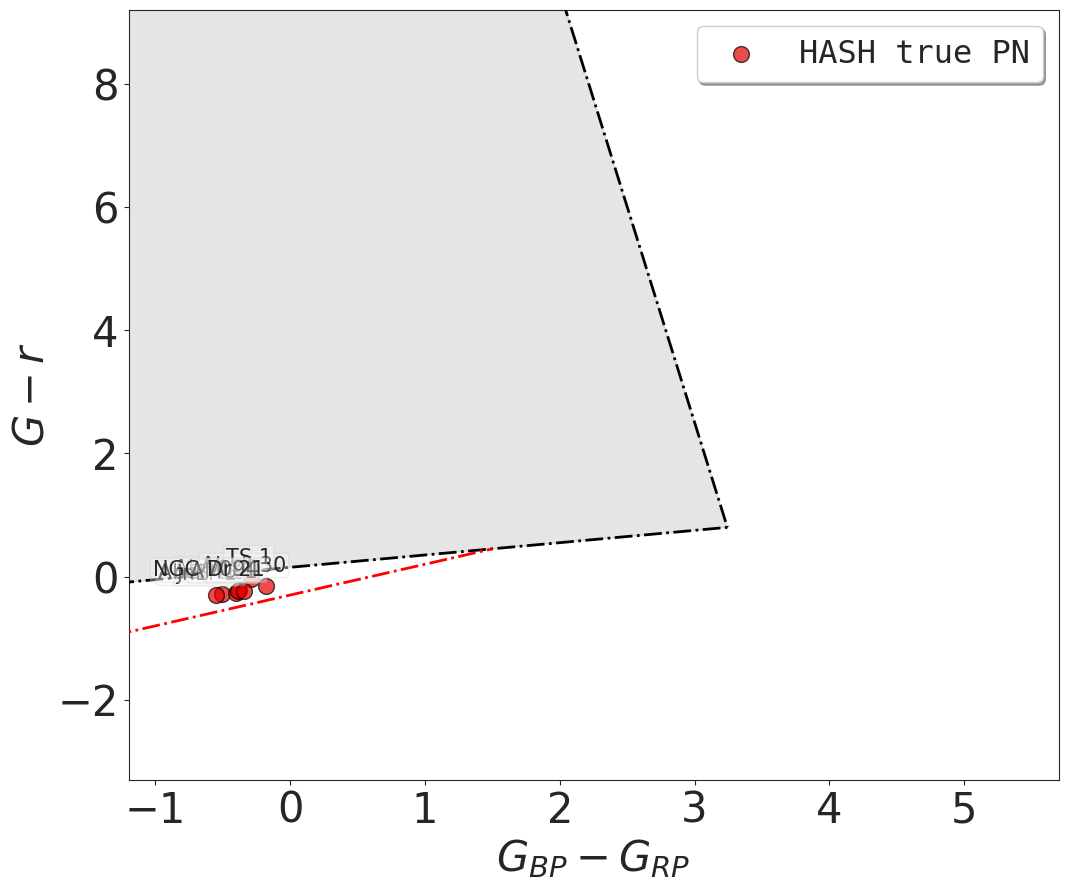

In [18]:
#Plotting
lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - r$', fontsize=30)
ax.set_xlim(-1.2, 5.7)
ax.set_ylim(-3.3, 9.2)
#ax.set_xlim(0, 2)
#ax.set_ylim(-2, 2)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
#ax.scatter(bp_rp_f, G_r_f, s=150, c = sns.xkcd_palette(["denim blue"]), edgecolors= "b", zorder = 1, lw=3, alpha = 0.7, label = "PN candidates")
ax.scatter(bp_rp_t_medium, G_r_t_medium, s=130, c = sns.xkcd_palette(["red"]), edgecolors= "k", zorder = 1, lw=1, alpha = 0.7, label = "HASH true PN")
#ax.scatter(bp_rp_p, G_r_p, s=50, c = sns.xkcd_palette(["pale yellow"]), edgecolors= "y", zorder = 1, lw=3, alpha = 0.6, label = "HASH l and p PN")

# Region where are located the PNe
result = findIntersection(0.2, 0.15, -7, 23.5, 0.0)
result1 = findIntersection(0.2, 0.15, 0.5, -0.3, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = 0.2*x_new + 0.15
yy = -7*x_new + 23.5
yyy = 0.5*x_new1 - 0.3
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new, yy , color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new1, yyy , color='r', linestyle='-.', lw=2, zorder=30)

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.3, pad=0.1)
#for label_, x, y in zip(tab_f["LAMOST"], bp_rp_f, G_r_f):
#    ax.annotate(label_.split("T ")[-1], (x, y), alpha=0.8, size=15,
#                   xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

# True
for label_, x, y in zip(tabTrue_medium["Name"], bp_rp_t_medium, G_r_t_medium):
    ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                    xytext=(15.0, 8), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

#for label_, x, y in zip(dfLP["FileName"], bp_rp_p, G_r_p):
    #ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                   #xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

ax.legend(prop={'family': 'monospace', 'size': 23}, loc="upper right", **lgd_kws)

In [19]:
tabTrue_medium.sort("RA")
tabTrue_medium

Name,PNstat,MajDiam,MinDiam,FileName,RA,DEC,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff_x,B_Teff_xa,logg,b_logg_x,B_logg_xa,[Fe/H],b_[Fe/H]_x,B_[Fe/H]_xa,Dist,b_Dist_x,B_Dist_xa,A0,b_A0_x,B_A0_xa,AG,b_AG_x,B_AG_xa,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,objID,RAJ2000_x,DEJ2000_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,f_objID,Qual,Epoch,Ns,Nd,gmag_x,e_gmag_x,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,angDist_x,G - r,G - g
str8,str1,float64,float64,str43,float64,float64,str28,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64
Abell 20,T,67.3,60.5,spec-58068-HD073149N010954B01_sp14-231.fits,110.740255,1.759399,Gaia DR3 3135710272253699584,110.74027567955,1.75943853243,0.0,0.0,112.0,1636148068921376768,3135710272253699584,1221081923,0.0516,0.0464,0.542,0.0569,9.5326,6.834,-6.449,0.069,2.263,0.067,-0.1052,0.0159,-0.1946,0.1153,-0.2834,0.0766,-0.1206,-0.0061,0.2099,-0.3415,218,0,218,0,0.3334,295.37,0.212,2.4589,31,False,1.863,--,--,--,--,--,--,--,25,16,0.109766,25,0.2259,97.0,1,0,1.015,0,216,5111.60999,5.53107,924.163,16.415972,0.002995,24,4169.92,17.3272,240.658,16.288223,0.005305,21,1703.13,13.0458,130.55,16.669779,0.009135,1.149,0,1,0,1,0,-0.381556,-0.127748,-0.253807,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.0,0.0,5e-05,9998.9,9997.2,9999.6,4.4412,4.4338,4.4826,-1.5386,-1.6024,-1.5114,6842.974,6511.283,6906.6924,0.0003,0.0,0.0008,0.0003,0.0,0.0008,0.0001,0.0,0.0004,PHOENIX,110.74030435369,1.75942847338,1.120337,1.071914,-0.3448,0.160596,110111107402491733,110.74028565,1.75943727,0.004,0.003,90.0,1376051200,164,56314.33547454,5,61,16.2751,0.0041,16.2687,0.0096,115000,16.6302,0.0042,16.6564,0.0088,16696,16.982,0.0029,17.0333,0.0046,16696,17.2356,0.0072,17.3222,0.0091,16696,17.397,0.012,17.543,0.0211,16696,0.176478,-0.

- spec-56249-HD084529N184902M01_sp08-197.fits and Object spec-58460-KII084529N184902B02_sp08-197.fits, si cambiar
- spec-58257-KP192102N424113V05_sp13-110.fits and Object spec-56436-kepler02_1_sp13-139.fits
- spec-56966-HD213605N150455V01_sp01-008.fits and Object spec-57325-EG214033N103644V01_sp16-228.fits, si cambiar

The outside

In [20]:
m_outside =  (0.5*bp_rp_t - 0.3 >= G_r_t) 
tabTrue_outside = tabTrue[m_outside]

In [21]:
G_r_t_outside = tabTrue_outside['Gmag'] - tabTrue_outside['rmag']
bp_rp_t_outside = tabTrue_outside['BP-RP']

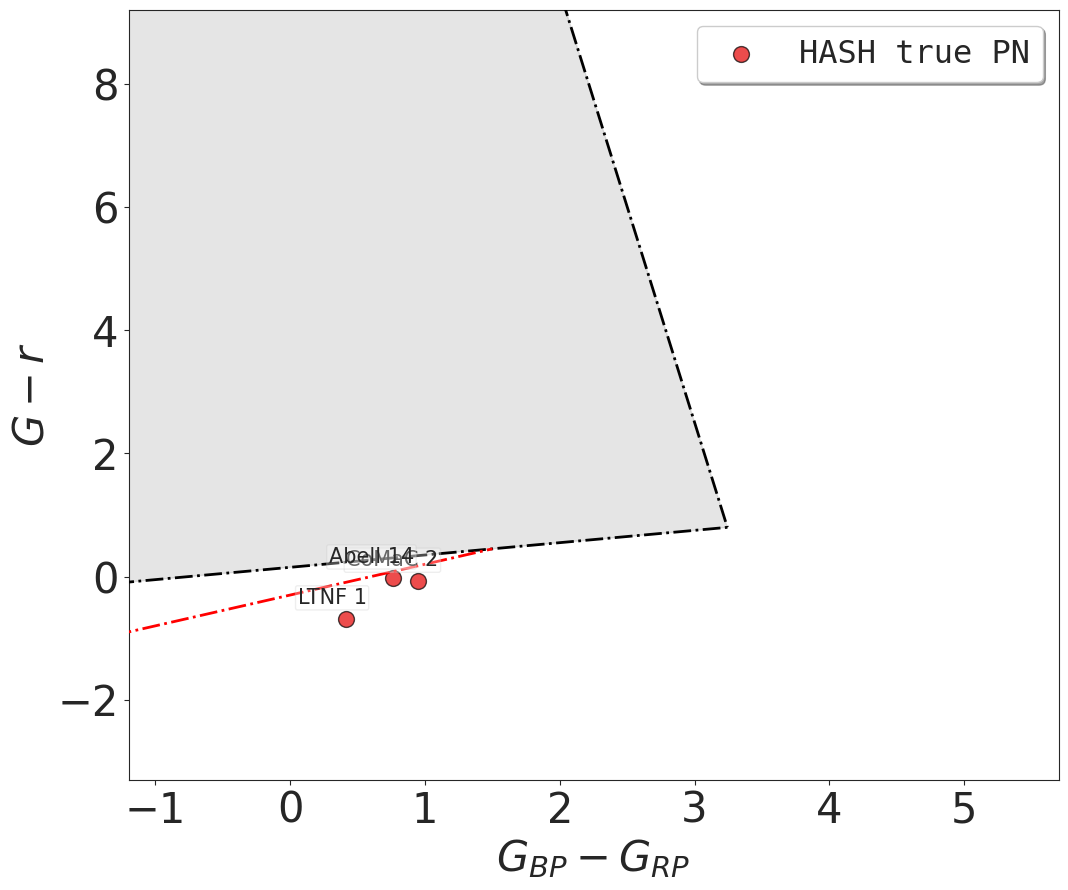

In [22]:
#Plotting
lgd_kws = {'frameon': True, 'fancybox': True, 'shadow': True}
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 10))
plt.tick_params(axis='x', labelsize=30) 
plt.tick_params(axis='y', labelsize=30)
plt.xlabel(r'$G_{BP} - G_{RP}$', fontsize=30)
plt.ylabel(r'$G - r$', fontsize=30)
ax.set_xlim(-1.2, 5.7)
ax.set_ylim(-3.3, 9.2)
#ax.set_xlim(0, 2)
#ax.set_ylim(-2, 2)
#fig = plt.figure(figsize=(10, 8))
#ax = fig.add_subplot(111)
#ax.scatter(bp_rp_f, G_r_f, s=150, c = sns.xkcd_palette(["denim blue"]), edgecolors= "b", zorder = 1, lw=3, alpha = 0.7, label = "PN candidates")
ax.scatter(bp_rp_t_outside, G_r_t_outside, s=130, c = sns.xkcd_palette(["red"]), edgecolors= "k", zorder = 1, lw=1, alpha = 0.7, label = "HASH true PN")
#ax.scatter(bp_rp_p, G_r_p, s=50, c = sns.xkcd_palette(["pale yellow"]), edgecolors= "y", zorder = 1, lw=3, alpha = 0.6, label = "HASH l and p PN")

# Region where are located the PNe
result = findIntersection(0.2, 0.15, -7, 23.5, 0.0)
result1 = findIntersection(0.2, 0.15, 0.5, -0.3, 0.0)

x_new = np.linspace(-15.5, result,  200)
x_new1 = np.linspace(-15.5, result1,  200)
y = 0.2*x_new + 0.15
yy = -7*x_new + 23.5
yyy = 0.5*x_new1 - 0.3
#Mask
#mask = y >= result_y - 0.5
ax.plot(x_new, y, color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new, yy , color='k', linestyle='-.', lw=2, zorder=30)
ax.plot(x_new1, yyy , color='r', linestyle='-.', lw=2, zorder=30)

#reshape
x_new = x_new.ravel()
y = y.ravel()
yy = yy.ravel()
plt.fill_between(x_new, y, yy, color="k", alpha=0.1)

bbox_props = dict(boxstyle="round", fc="w", ec="0.78", alpha=0.3, pad=0.1)
#for label_, x, y in zip(tab_f["LAMOST"], bp_rp_f, G_r_f):
#    ax.annotate(label_.split("T ")[-1], (x, y), alpha=0.8, size=15,
#                   xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

# True
for label_, x, y in zip(tabTrue_outside["Name"], bp_rp_t_outside, G_r_t_outside):
    ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                    xytext=(15.0, 8), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

#for label_, x, y in zip(dfLP["FileName"], bp_rp_p, G_r_p):
    #ax.annotate(label_.split(".fit")[0], (x, y), alpha=1, size=15,
                   #xytext=(155.0, 10), textcoords='offset points', ha='right', va='bottom', bbox=bbox_props, zorder=100)

ax.legend(prop={'family': 'monospace', 'size': 23}, loc="upper right", **lgd_kws)

In [23]:
tabTrue_outside.sort("RA")
tabTrue_outside

Name,PNstat,MajDiam,MinDiam,FileName,RA,DEC,DR3Name,RAdeg,DEdeg,errHalfMaj,errHalfMin,errPosAng,SolID,Source,RandomI,e_RAdeg,e_DEdeg,Plx,e_Plx,RPlx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RADEcor,RAPlxcor,RApmRAcor,RApmDEcor,DEPlxcor,DEpmRAcor,DEpmDEcor,PlxpmRAcor,PlxpmDEcor,pmRApmDEcor,NAL,NAC,NgAL,NbAL,gofAL,chi2AL,epsi,sepsi,Solved,APF,nueff,pscol,e_pscol,RApscolCorr,DEpscolCorr,PlxpscolCorr,pmRApscolCorr,pmDEpscolCorr,MatchObsA,Nper,amax,MatchObs,IPDgofha,IPDgofhp,IPDfmp,IPDfow,RUWE,Dup,o_Gmag,FG,e_FG,RFG,Gmag,e_Gmag,o_BPmag,FBP,e_FBP,RFBP,BPmag,e_BPmag,o_RPmag,FRP,e_FRP,RFRP,RPmag,e_RPmag,E(BP/RP),NBPcont,NBPblend,NRPcont,NRPblend,Mode,BP-RP,BP-G,G-RP,RV,e_RV,n_RV,o_RV,o_RVd,RVNper,RVS/N,RVgof,RVchi2,RVTdur,RVamp,RVtempTeff,RVtemplogg,RVtemp[Fe/H],Vatmparam,vbroad,e_Vbroad,o_Vbroad,GRVSmag,e_GRVSmag,o_GRVSmag,RVSS/N,VarFlag,PQSO,PGal,PSS,Teff,b_Teff_x,B_Teff_xa,logg,b_logg_x,B_logg_xa,[Fe/H],b_[Fe/H]_x,B_[Fe/H]_xa,Dist,b_Dist_x,B_Dist_xa,A0,b_A0_x,B_A0_xa,AG,b_AG_x,B_AG_xa,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist,objID,RAJ2000_x,DEJ2000_x,errHalfMaj_x,errHalfMin_x,errPosAng_x,f_objID,Qual,Epoch,Ns,Nd,gmag_x,e_gmag_x,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags,angDist_x,G - r,G - g
str8,str1,float64,float64,str43,float64,float64,str28,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,bool,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,int64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str13,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str7,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64
CoMaC 2,T,12.0,--,spec-56943-GAC079N41B1_sp07-037.fits,80.487607,39.517347,Gaia DR3 187946497564416384,80.48763955803,39.51735113379,0.0,0.0,111.0,1636148068921376768,187946497564416384,1628890890,0.0317,0.0239,0.2052,0.036,5.693,1.541,1.435,0.04,-0.564,0.03,-0.2636,0.0739,-0.3469,0.3279,-0.3923,0.2445,-0.4907,0.1267,0.2776,-0.2744,231,0,231,0,-0.172,231.03,0.0,0.0,31,False,1.542,--,--,--,--,--,--,--,27,15,0.060518,27,0.03383,177.4,0,0,0.99,0,230,16177.19171,14.2338,1136.54,15.165109,0.002916,26,8534.38,19.2851,442.537,15.510612,0.003715,25,11831.0,54.2354,218.142,14.565343,0.00625,1.259,0,2,0,1,0,0.94527,0.345504,0.599766,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,NOT_AVAILABLE,0.0,0.0,1.0,19969.7,19905.9,19992.5,4.0421,4.0324,4.0569,-0.1099,-0.1753,-0.0198,8372.84,8238.38,8420.055,2.5411,2.5382,2.5439,2.3282,2.3255,2.3309,1.2751,1.2736,1.2767,A,80.48763129311,39.51735363989,0.659207,0.48914,-0.2905,0.091635,155420804876001481,80.4876371,39.51735256,0.021,0.006,90.0,503636096,60,56095.1187963,5,41,15.6234,0.0057,15.4982,0.0053,115000,15.2428,0.0045,15.1379,0.0042,115000,14.9885,0.0036,15.0021,0.0069,115000,14.8303,0.0154,14.8628,0.0194,115000,14.6588,0.0034,14.6089,0.0039,115000,0.085955,-0.07769100000000151,-